In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

In [2]:
## 使用read_csv读取订单信息表
order1 = pd.read_csv('C:/Users/ASUS/Desktop/附件1.csv', encoding = 'gbk')
print('使用read_csv读取的订单信息表的长度为：', len(order1))

使用read_csv读取的订单信息表的长度为： 70679


In [3]:
## 使用read_csv读取菜品订单信息表,header=None
order2 = pd.read_csv('C:/Users/ASUS/Desktop/附件1.csv', sep = ',',header = None,encoding = 'gbk')
print('订单信息表为：','\n',order2.head())


订单信息表为： 
                                0                1     2     3             4  \
0                            订单号             设备ID  应付金额  实际金额            商品   
1  DD201708167493663618499909784  E43A6E078A07631   4.5   4.5  68g好丽友巧克力派2枚   
2  DD201708167493663555814061164  E43A6E078A04172     3     3    40g双汇玉米热狗肠   
3  DD201708167493578526890939886  E43A6E078A06874   5.5   5.5     430g泰奇八宝粥   
4  DD201708167493683507186615837  E43A6E078A04228     5     5  48g好丽友薯愿香烤原味   

               5   6       7    8     9  
0           支付时间  地点      状态   提现  订单数量  
1  2017/1/1 0:53   D  已出货未退款  已提现     1  
2  2017/1/1 1:33   A  已出货未退款  已提现     1  
3  2017/1/1 8:45   E  已出货未退款  已提现     1  
4  2017/1/1 9:05   C  已出货未退款  已提现     1  


D:\a\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2,3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('订单详情表的索引为：', order1.index)
print('订单详情表的所有值为：', '\n', order1.values)
print('订单详情表的列名为：', '\n', order1.columns)
print('订单详情表的数据类型为：', '\n', order1.dtypes)

订单详情表的索引为： RangeIndex(start=0, stop=70679, step=1)
订单详情表的所有值为： 
 [['DD201708167493663618499909784' 'E43A6E078A07631' 4.5 ... '已出货未退款'
  '已提现' 1]
 ['DD201708167493663555814061164' 'E43A6E078A04172' 3.0 ... '已出货未退款'
  '已提现' 1]
 ['DD201708167493578526890939886' 'E43A6E078A06874' 5.5 ... '已出货未退款'
  '已提现' 1]
 ...
 ['DD20170613035815879F3941D1762' 'E43A6E078A06874' 2.5 ... '已出货未退款'
  '已提现' 1]
 ['DD20170613020607768E3940FA188' 'E43A6E078A04228' 3.0 ... '已出货未退款'
  '已提现' 1]
 ['DD2017060217303716A53CCD6B185' 'E43A6E078A07631' 6.0 ... '已出货未退款'
  '已提现' 1]]
订单详情表的列名为： 
 Index(['订单号', '设备ID', '应付金额', '实际金额', '商品', '支付时间', '地点', '状态', '提现', '订单数量'], dtype='object')
订单详情表的数据类型为： 
 订单号      object
设备ID     object
应付金额    float64
实际金额    float64
商品       object
支付时间     object
地点       object
状态       object
提现       object
订单数量      int64
dtype: object


In [5]:
print('订单总量为：',order1.shape[0])
print('订单详情表中交易总额为：', np.sum(order1['实际金额']))  #

订单总量为： 70679
订单详情表中交易总额为： 286979.7


In [6]:
df1 = pd.read_csv('C:/Users/ASUS/Desktop/附件1.csv', encoding='gbk')
df2 = pd.read_csv('C:/Users/ASUS/Desktop/附件2.csv', encoding='gbk')
order1 = pd.merge(df1, df2,left_on='商品',right_on='商品')
order1.to_csv('F:/泰迪/outfile.csv', index=False, encoding='gbk')

In [7]:
order3 = order1.groupby('设备ID')
print('分组后的订单详情表为：', order3)  
lenth = len(order3.count())
orderquantity = order3.size().values
print(lenth)
print(orderquantity)


分组后的订单详情表为： <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000022881C1BF60>
5
[13482 10486 14493 23505  8713]


In [8]:
one = order3.get_group('E43A6E078A04172')  #A
two = order3.get_group('E43A6E078A04172')  #B
three = order3.get_group('E43A6E078A04228') #C
four = order3.get_group('E43A6E078A07631') #D
five = order3.get_group('E43A6E078A06874') #E

In [9]:
import os
print('订单信息表写入文本文件前目录内文件列表为：\n', os.listdir('F:/泰迪'))
## 将分组结果以csv格式存储
one.to_csv('F:/泰迪/task1-1A.csv',sep = ',',index = False) 
two.to_csv('F:/泰迪/task1-1B.csv',sep = ',',index = False) 
three.to_csv('F:/泰迪/task1-1C.csv',sep = ',',index = False) 
four.to_csv('F:/泰迪/task1-1D.csv',sep = ',',index = False) 
five.to_csv('F:/泰迪/task1-1E.csv',sep = ',',index = False) 
print('订单信息表写入文本文件后目录内文件列表为：\n', os.listdir('F:/泰迪'))


订单信息表写入文本文件前目录内文件列表为：
 ['1.csv', 'outfile.csv', 'task1-1A.csv', 'task1-1B.csv', 'task1-1C.csv', 'task1-1D.csv', 'task1-1E.csv', 'task2-1A.csv', 'task2-1B.csv', 'task2-1C.csv', 'task2-1D.csv', 'task2-1E.csv', '六月订单销量前五直方图.png', '各售货机毛利润占总毛利润比例饼图.png', '机器1月环比增长图.png', '机器1每月总交易额.png', '机器2  月环比增长图.png', '机器2每月总交易额.png', '机器3  月环比增长图.png', '机器3每月总交易额.png', '机器4  月环比增长图.png', '机器4每月总交易额.png', '机器5 月环比增长图.png', '机器5每月总交易额.png', '机器A月环比增长图.png', '机器A每月总交易额.png', '机器B  月环比增长图.png', '机器B每月总交易额.png', '机器C  月环比增长图.png', '机器C每月平均交易额气泡图.png', '机器C每月总交易额.png', '机器D  月环比增长图.png', '机器D每月总交易额.png', '机器E 月环比增长图.png', '机器E每月总交易额.png', '气泡图.png', '热力图.html', '订单统计.csv']
订单信息表写入文本文件后目录内文件列表为：
 ['1.csv', 'outfile.csv', 'task1-1A.csv', 'task1-1B.csv', 'task1-1C.csv', 'task1-1D.csv', 'task1-1E.csv', 'task2-1A.csv', 'task2-1B.csv', 'task2-1C.csv', 'task2-1D.csv', 'task2-1E.csv', '六月订单销量前五直方图.png', '各售货机毛利润占总毛利润比例饼图.png', '机器1月环比增长图.png', '机器1每月总交易额.png', '机器2  月环比增长图.png', '机器2每月总交易额.png', '机器3  月环比增长图.png',

In [10]:
print('进行转换前订单信息表支付时间的类型为：',  one['支付时间'].dtypes)
one['支付时间'] = pd.to_datetime(one['支付时间'])
two['支付时间'] = pd.to_datetime(two['支付时间'])
three['支付时间'] = pd.to_datetime(three['支付时间'])

five['支付时间'] = pd.to_datetime(five['支付时间'])
four['支付时间'] = pd.to_datetime(four['支付时间'])
print('进行转换后订单信息表支付时间的类型为：', two['支付时间'].dtypes)

进行转换前订单信息表支付时间的类型为： object


D:\a\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\a\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\a\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

进行转换后订单信息表支付时间的类型为： datetime64[ns]


D:\a\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\a\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [11]:
one5 = one.set_index('支付时间')
A = one5['2017/5']
A

,订单号,设备ID,应付金额,实际金额,商品,地点,状态,提现,订单数量,大类,二级类
支付时间,,,,,,,,,,,
2017-05-10 20:15:00,DD201708167493091719979004996,E43A6E078A04172,4.0,4.0,68g好丽友巧克力派2枚,A,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-16 19:08:00,DD201708167493759152443537589,E43A6E078A04172,4.5,4.5,68g好丽友巧克力派2枚,A,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-02 14:52:00,DD2017081674930648661849220542,E43A6E078A04172,1.5,1.5,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-02 15:45:00,DD2017081674930652044438019595,E43A6E078A04172,1.5,1.5,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-03 12:10:00,DD2017081674930679937086812862,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-04 17:54:00,DD2017081674930714014023507948,E43A6E078A04172,1.5,1.5,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-05 15:44:00,DD201708167493796041368398792,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-05 18:29:00,DD2017081674930750718911319339,E43A6E078A04172,1.5,1.5,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-06 00:31:00,DD2017081674930759116666387039,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋


In [12]:
print('订单总量为：',A.shape[0])
print('订单详情表中实际金额的总额为：', np.sum(A['实际金额']))

订单总量为： 756
订单详情表中实际金额的总额为： 3385.1


In [13]:
two5 = two.set_index('支付时间')
B = two5['2017/5']
B


,订单号,设备ID,应付金额,实际金额,商品,地点,状态,提现,订单数量,大类,二级类
支付时间,,,,,,,,,,,
2017-05-10 20:15:00,DD201708167493091719979004996,E43A6E078A04172,4.0,4.0,68g好丽友巧克力派2枚,A,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-16 19:08:00,DD201708167493759152443537589,E43A6E078A04172,4.5,4.5,68g好丽友巧克力派2枚,A,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-02 14:52:00,DD2017081674930648661849220542,E43A6E078A04172,1.5,1.5,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-02 15:45:00,DD2017081674930652044438019595,E43A6E078A04172,1.5,1.5,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-03 12:10:00,DD2017081674930679937086812862,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-04 17:54:00,DD2017081674930714014023507948,E43A6E078A04172,1.5,1.5,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-05 15:44:00,DD201708167493796041368398792,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-05 18:29:00,DD2017081674930750718911319339,E43A6E078A04172,1.5,1.5,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-06 00:31:00,DD2017081674930759116666387039,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,A,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋


In [14]:
print('订单总量为：',B.shape[0])
print('订单详情表中实际金额的总额为：', np.sum(B['实际金额']))

订单总量为： 756
订单详情表中实际金额的总额为： 3385.1


In [15]:
three5 = three.set_index('支付时间')
C = three5['2017/5']
C

,订单号,设备ID,应付金额,实际金额,商品,地点,状态,提现,订单数量,大类,二级类
支付时间,,,,,,,,,,,
2017-05-02 18:17:00,DD201708167493811342530830268,E43A6E078A04228,4.5,4.5,68g好丽友巧克力派2枚,C,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-11 12:50:00,DD2017081674930935078924268584,E43A6E078A04228,4.5,4.5,68g好丽友巧克力派2枚,C,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-14 08:44:00,DD201708167493102216593143616,E43A6E078A04228,3.5,3.5,68g好丽友巧克力派2枚,C,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-24 19:27:00,DD20170816749314731914624413,E43A6E078A04228,4.5,4.5,68g好丽友巧克力派2枚,C,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-27 09:47:00,DD201708167493163316739804168,E43A6E078A04228,7.0,7.0,68g好丽友巧克力派2枚,C,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-29 17:36:00,DD201708167493177597019258465,E43A6E078A04228,7.0,7.0,68g好丽友巧克力派2枚,C,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-29 23:17:00,DD201708167493180578994297218,E43A6E078A04228,4.5,4.5,68g好丽友巧克力派2枚,C,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-08 23:55:00,DD2017081674930854513140901057,E43A6E078A04228,1.5,1.5,40g双汇玉米热狗肠,C,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-09 13:30:00,DD201708167493357936800360864,E43A6E078A04228,1.5,1.5,40g双汇玉米热狗肠,C,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋


In [16]:
print('订单总量为：',C.shape[0])
print('订单详情表中实际金额的总额为：', np.sum(C['实际金额']))

订单总量为： 789
订单详情表中实际金额的总额为： 3729.4


In [17]:
four5 = four.set_index('支付时间')
D = four5['2017/5']
D

,订单号,设备ID,应付金额,实际金额,商品,地点,状态,提现,订单数量,大类,二级类
支付时间,,,,,,,,,,,
2017-05-04 07:53:00,DD2017081674930702139754200256,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,D,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-13 15:11:00,DD201708167493767514805262783,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,D,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-05 20:51:00,DD2017081674930755644848373814,E43A6E078A07631,1.5,1.5,40g双汇玉米热狗肠,D,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-06 15:05:00,DD201708167493792317422509662,E43A6E078A07631,3.0,3.0,40g双汇玉米热狗肠,D,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-08 23:54:00,DD2017081674930854041938381899,E43A6E078A07631,1.5,1.5,40g双汇玉米热狗肠,D,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-11 12:06:00,DD201708167493093261581269453,E43A6E078A07631,3.0,3.0,40g双汇玉米热狗肠,D,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-14 00:31:00,DD201708167493764248557926072,E43A6E078A07631,3.0,3.0,40g双汇玉米热狗肠,D,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-15 11:55:00,DD201708167493104536841288823,E43A6E078A07631,1.5,1.5,40g双汇玉米热狗肠,D,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-17 16:48:00,DD201708167493112381939819569,E43A6E078A07631,3.0,3.0,40g双汇玉米热狗肠,D,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋


In [18]:
print('订单总量为：',D.shape[0])
print('订单详情表中实际金额的总额为：', np.sum(D['实际金额']))

订单总量为： 564
订单详情表中实际金额的总额为： 2392.1000000000004


In [19]:
five5 = five.set_index('支付时间')
E = five5['2017/5']
E

,订单号,设备ID,应付金额,实际金额,商品,地点,状态,提现,订单数量,大类,二级类
支付时间,,,,,,,,,,,
2017-05-01 05:40:00,DD2017081674930602863039023772,E43A6E078A06874,4.5,4.5,68g好丽友巧克力派2枚,E,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-07 23:18:00,DD20170816749308197207338096,E43A6E078A06874,4.5,4.5,68g好丽友巧克力派2枚,E,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-20 13:15:00,DD201708167493122892455952756,E43A6E078A06874,4.5,4.5,68g好丽友巧克力派2枚,E,已出货未退款,已提现,1,非饮料,饼干糕点
2017-05-01 18:28:00,DD2017081674930620846309308569,E43A6E078A06874,1.5,1.5,40g双汇玉米热狗肠,E,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-05 04:34:00,DD2017081674930725263989924294,E43A6E078A06874,1.5,1.5,40g双汇玉米热狗肠,E,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-05 23:16:00,DD2017081674930755877648183023,E43A6E078A06874,4.5,4.5,40g双汇玉米热狗肠,E,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-06 21:21:00,DD20170816749307848439672645,E43A6E078A06874,3.0,3.0,40g双汇玉米热狗肠,E,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-09 17:50:00,DD2017081674930880522902303169,E43A6E078A06874,4.5,4.5,40g双汇玉米热狗肠,E,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋
2017-05-10 10:17:00,DD2017081674930896880347859213,E43A6E078A06874,2.0,2.0,40g双汇玉米热狗肠,E,已出货未退款,已提现,1,非饮料,肉干/豆制品/蛋


In [20]:
print('订单总量为：',E.shape[0])
print('订单详情表中实际金额的总额为：', np.sum(E['实际金额']))


订单总量为： 1292
订单详情表中实际金额的总额为： 5699.0


In [21]:
order1['支付时间'] = pd.to_datetime(order1['支付时间'])
o5 = order1.set_index('支付时间')
order5 = o5['2017/5']
print('五月份售货机订单总量:',order5.shape[0]-1)
print('订单详情表中五月份交易总额为：', np.sum(order5['实际金额']))

五月份售货机订单总量: 4269
订单详情表中五月份交易总额为： 18886.8


In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

In [23]:
#机器A
one12 = one.groupby(one['支付时间'].dt.month.rename('month'))
print('分组后的订单详情表为：', one12)  
lenth = len(one12.count())
orderquantity = one12.size().values
print(lenth)
print(orderquantity)
orderquantity.reshape([1,12])
a = np.array([31 ,28 ,31 ,30 ,31 ,30 ,31 ,31 ,30 ,31 ,30 ,31])
print ('每月日均订单量为：',np.rint(orderquantity / a))

print('每月的每单平均交易额为：',one12.agg({'实际金额':np.mean}))

print('每月的总交易额为：',one12.agg({'实际金额':np.sum}))

one12 = one12.agg({'实际金额':np.sum})


分组后的订单详情表为： <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000228824EEAC8>
12
[ 335  114  255  447  756 1669  476  666 1040 1565 1160 2003]
每月日均订单量为： [11.  4.  8. 15. 24. 56. 15. 21. 35. 50. 39. 65.]
每月的每单平均交易额为：            实际金额
month          
1      4.506567
2      3.864035
3      3.585490
4      4.036913
5      4.477646
6      4.047394
7      4.097689
8      3.358709
9      4.307212
10     4.020703
11     4.471552
12     3.787868
每月的总交易额为：          实际金额
month        
1      1509.7
2       440.5
3       914.3
4      1804.5
5      3385.1
6      6755.1
7      1950.5
8      2236.9
9      4479.5
10     6292.4
11     5187.0
12     7587.1


In [24]:
#机器B
two12 = two.groupby(two['支付时间'].dt.month.rename('month'))
print('分组后的订单详情表为：', two12)  
lenth = len(two12.count())
orderquantity = two12.size().values
print(lenth)
print(orderquantity)
orderquantity.reshape([1,12])
a = np.array([31 ,28 ,31 ,30 ,31 ,30 ,31 ,31 ,30 ,31 ,30 ,31])
print ('每月日均订单量为：',np.rint(orderquantity / a))
print('每月的每单平均交易额为：',two12.agg({'实际金额':np.mean}))
print('每月的总交易额为：',two12.agg({'实际金额':np.sum}))
two12 = two12.agg({'实际金额':np.sum})

分组后的订单详情表为： <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000022881C35E48>
12
[ 335  114  255  447  756 1669  476  666 1040 1565 1160 2003]
每月日均订单量为： [11.  4.  8. 15. 24. 56. 15. 21. 35. 50. 39. 65.]
每月的每单平均交易额为：            实际金额
month          
1      4.506567
2      3.864035
3      3.585490
4      4.036913
5      4.477646
6      4.047394
7      4.097689
8      3.358709
9      4.307212
10     4.020703
11     4.471552
12     3.787868
每月的总交易额为：          实际金额
month        
1      1509.7
2       440.5
3       914.3
4      1804.5
5      3385.1
6      6755.1
7      1950.5
8      2236.9
9      4479.5
10     6292.4
11     5187.0
12     7587.1


In [25]:
#机器C
three12 = three.groupby(three['支付时间'].dt.month.rename('month'))
print('分组后的订单详情表为：', three12)  
lenth = len(three12.count())
orderquantity = three12.size().values
print(lenth)
print(orderquantity)
orderquantity.reshape([1,12])
a = np.array([31 ,28 ,31 ,30 ,31 ,30 ,31 ,31 ,30 ,31 ,30 ,31])
print ('每月日均订单量为：',np.rint(orderquantity / a))
print('每月的每单平均交易额为：',three12.agg({'实际金额':np.mean}))
print('每月的总交易额为：',three12.agg({'实际金额':np.sum}))
three12 = three12.agg({'实际金额':np.sum})

分组后的订单详情表为： <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000228824CFDD8>
12
[ 379  207  263  734  789 1882  764 1259 1678 2216 1943 2379]
每月日均订单量为： [12.  7.  8. 24. 25. 63. 25. 41. 56. 71. 65. 77.]
每月的每单平均交易额为：            实际金额
month          
1      4.328496
2      3.826087
3      3.769962
4      4.403678
5      4.726743
6      4.501700
7      3.988351
8      3.913582
9      4.427294
10     4.273330
11     4.352393
12     3.943043
每月的总交易额为：          实际金额
month        
1      1640.5
2       792.0
3       991.5
4      3232.3
5      3729.4
6      8472.2
7      3047.1
8      4927.2
9      7429.0
10     9469.7
11     8456.7
12     9380.5


In [26]:
#机器D
four12 = four.groupby(four['支付时间'].dt.month.rename('month'))
print('分组后的订单详情表为：', four12)  
lenth = len(four12.count())
orderquantity = four12.size().values
print(lenth)
print(orderquantity)
orderquantity.reshape([1,12])
a = np.array([31 ,28 ,31 ,30 ,31 ,30 ,31 ,31 ,30 ,31 ,30 ,31])
print ('每月日均订单量为：',np.rint(orderquantity / a))
print('每月的每单平均交易额为：',four12.agg({'实际金额':np.mean}))
print('每月的总交易额为：',four12.agg({'实际金额':np.sum}))
four12 = four12.agg({'实际金额':np.sum})

分组后的订单详情表为： <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000022881C35B38>
12
[ 259  141  192  443  564 1040  317  715  983 1186 1210 1663]
每月日均订单量为： [ 8.  5.  6. 15. 18. 35. 10. 23. 33. 38. 40. 54.]
每月的每单平均交易额为：            实际金额
month          
1      3.692664
2      3.088652
3      4.305729
4      3.790293
5      4.241312
6      4.025962
7      4.229653
8      3.316503
9      3.899390
10     3.884233
11     3.862314
12     3.572580
每月的总交易额为：          实际金额
month        
1       956.4
2       435.5
3       826.7
4      1679.1
5      2392.1
6      4187.0
7      1340.8
8      2371.3
9      3833.1
10     4606.7
11     4673.4
12     5941.2


In [27]:
#机器E
five12 = five.groupby(five['支付时间'].dt.month.rename('month'))
print('分组后的订单详情表为：', five12)  
lenth = len(five12.count())
orderquantity = five12.size().values
print(lenth)
print(orderquantity)
orderquantity.reshape([1,12])
a = np.array([31 ,28 ,31 ,30 ,31 ,30 ,31 ,31 ,30 ,31 ,30 ,31])
print ('每月日均订单量为：',np.rint(orderquantity / a))
print('每月的每单平均交易额为：',five12.agg({'实际金额':np.mean}))
print('每月的总交易额为：',five12.agg({'实际金额':np.sum}))
five12 = five12.agg({'实际金额':np.sum})

分组后的订单详情表为： <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000228824CDA58>
12
[ 354  258  350  895 1292 2593  813 1767 4134 2777 5020 3252]
每月日均订单量为： [ 11.   9.  11.  30.  42.  86.  26.  57. 138.  90. 167. 105.]
每月的每单平均交易额为：            实际金额
month          
1      4.680226
2      3.638372
3      4.305714
4      4.159888
5      4.410991
6      3.817856
7      3.919311
8      3.804471
9      4.125375
10     3.676125
11     4.283227
12     4.168973
每月的总交易额为：           实际金额
month         
1       1656.8
2        938.7
3       1507.0
4       3723.1
5       5699.0
6       9899.7
7       3186.4
8       6722.5
9      17054.3
10     10208.6
11     21501.8
12     13557.5


In [200]:
order6 = order1.set_index('支付时间')
six = order6['2017/6']
six = six.rename(columns={'提现': '六月订单总数'})


six = six[['商品','六月订单总数']].groupby('商品')

six = six.size().reset_index(name='六月订单总数')
six = six.sort_values(by = '六月订单总数',ascending=False)
six = six.head()
six

,商品,六月订单总数
192,怡宝纯净水,657
73,40g双汇玉米热狗肠,240
133,东鹏特饮,238
234,脉动,235
48,250ml维他柠檬茶,225


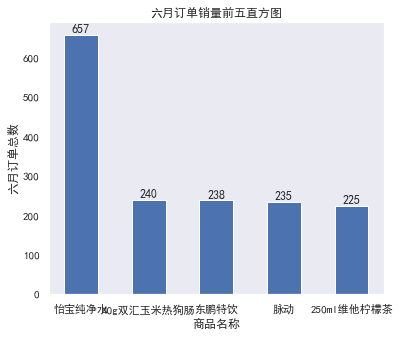

In [201]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
#name = six['商品']## 提取其中的columns数组，视为数据的标签
values = six['六月订单总数']## 提取其中的values数组，数据的存在位置
label = ['怡宝纯净水','40g双汇玉米热狗肠','东鹏特饮','脉动','250ml维他柠檬茶']## 刻度标签
plt.figure(figsize=(6,5))## 设置画布
#my_height = values[:,-1]
plt.bar(range(5), values, width = 0.5)## 绘制散点图
plt.xlabel('商品名称')## 添加横轴标签
plt.ylabel('六月订单总数')## 添加y轴名称
plt.xticks(range(5), label)
plt.title('六月订单销量前五直方图')## 添加图表标题

for a,b in zip(range(5),values):
    plt.text(a, b+0.1, b, va='bottom', ha='center')
    
plt.savefig('F:/泰迪/六月订单销量前五直方图.png')
plt.show()

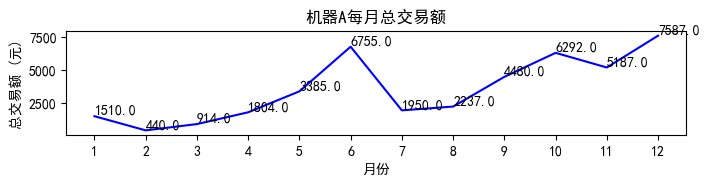

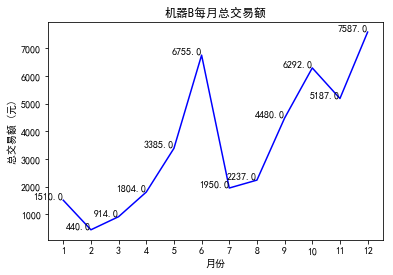

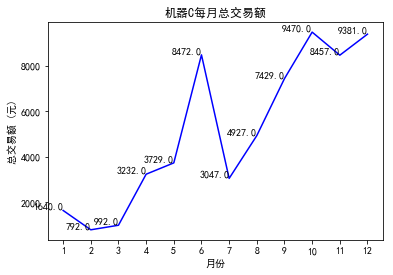

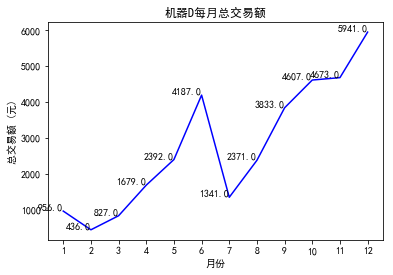

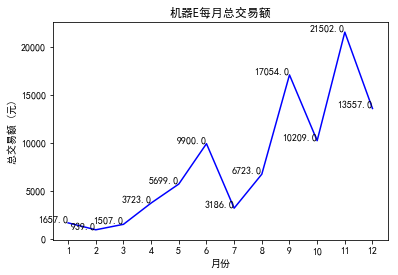

In [28]:

## 绘制折线图
p = plt.figure(dpi=100,figsize=(8,8))

#
ax1 = p.add_subplot(5,1,1)
plt.plot(range(1,13,1),one12['实际金额'],color = 'b',linestyle = '-')
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('总交易额 (元)')## 添加y轴名称
plt.title('机器A每月总交易额')## 添加图表标题
plt.xticks(range(1,13,1),range(1,13,1))

values = np.rint(one12['实际金额'])

for a,b in zip(range(1,13),values):
    plt.text(a, b+0.5, b, va='bottom', ha='left')
    
plt.savefig('F:/泰迪/机器A每月总交易额.png')

plt.show()

#
ax2 = p.add_subplot(5,1,2)
plt.plot(range(1,13,1),two12['实际金额'],color = 'b',linestyle = '-')
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('总交易额 (元)')## 添加y轴名称
plt.title('机器B每月总交易额')## 添加图表标题
plt.xticks(range(1,13,1),range(1,13,1))

values = np.rint(two12['实际金额'])

for a,b in zip(range(1,13),values):
    plt.text(a, b+0.5, b, va='bottom', ha='right')
    
plt.savefig('F:/泰迪/机器B每月总交易额.png')

plt.show()

#
ax3 = p.add_subplot(5,1,3)
plt.plot(range(1,13,1),three12['实际金额'],color = 'b',linestyle = '-')
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('总交易额 (元)')## 添加y轴名称
plt.title('机器C每月总交易额')## 添加图表标题
plt.xticks(range(1,13,1),range(1,13,1))

values = np.rint(three12['实际金额'])

for a,b in zip(range(1,13),values):
    plt.text(a, b+0.5, b, va='bottom', ha='right')
    
plt.savefig('F:/泰迪/机器C每月总交易额.png')

plt.show()

#
ax4 = p.add_subplot(5,1,4)
plt.plot(range(1,13,1),four12['实际金额'],color = 'b',linestyle = '-')
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('总交易额 (元)')## 添加y轴名称
plt.title('机器D每月总交易额')## 添加图表标题
plt.xticks(range(1,13,1),range(1,13,1))

values = np.rint(four12['实际金额'])

for a,b in zip(range(1,13),values):
    plt.text(a, b+0.5, b, va='bottom', ha='right')
    
plt.savefig('F:/泰迪/机器D每月总交易额.png')

plt.show()

#
ax5 = p.add_subplot(5,1,5)
plt.plot(range(1,13,1),five12['实际金额'],color = 'b',linestyle = '-')
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('总交易额 (元)')## 添加y轴名称
plt.title('机器E每月总交易额')## 添加图表标题
plt.xticks(range(1,13,1),range(1,13,1))

values = np.rint(five12['实际金额'])

for a,b in zip(range(1,13),values):
    plt.text(a, b+0.5, b, va='bottom', ha='right')
    
plt.savefig('F:/泰迪/机器E每月总交易额.png')

plt.show()

In [29]:

a = np.array(one12['实际金额'])
#a.reshape(1,12)
a1 = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(1,12):
    
    a1[i] = (a[i]-a[i-1])/a[i-1]
    
a1 = np.array(a1)
print(a1)

[ 0.         -0.70822018  1.07559591  0.97364104  0.87592131  0.99553928
 -0.7112552   0.14683415  1.00254817  0.40471035 -0.17567224  0.46271448]


In [30]:
b = np.array(two12['实际金额'])
#b.reshape(1,12)
b1 = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(1,12):
    b1[i] = (b[i]-b[i-1])/b[i-1]

b1 = np.array(b1)
print(b1)

[ 0.         -0.70822018  1.07559591  0.97364104  0.87592131  0.99553928
 -0.7112552   0.14683415  1.00254817  0.40471035 -0.17567224  0.46271448]


In [31]:
c = np.array(three12['实际金额'])
#c.reshape(1,12)
c1 = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(1,12):
    c1[i] = (c[i]-c[i-1])/c[i-1]
c1 = np.array(c1)
c1

array([ 0.        , -0.51722036,  0.25189394,  2.26001009,  0.15379142,
        1.27173272, -0.64034135,  0.6170129 ,  0.50775288,  0.27469377,
       -0.10697277,  0.10923883])

In [32]:
d = np.array(four12['实际金额'])
#d.reshape(1,12)
d1 = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(1,12):
    d1[i] = (d[i]-d[i-1])/d[i-1]
d1 = np.array(d1)
d1

array([ 0.        , -0.54464659,  0.89827784,  1.03108746,  0.42463224,
        0.75034489, -0.67977072,  0.768571  ,  0.61645511,  0.20182098,
        0.01447891,  0.27128001])

In [33]:
e = np.array(five12['实际金额'])
#e.reshape(1,12)
e1 = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(1,12):
    e1[i] = (e[i]-e[i-1])/e[i-1]
e1 = np.array(e1)
e1

array([ 0.        , -0.43342588,  0.60541174,  1.47053749,  0.53071365,
        0.73709423, -0.67813166,  1.10974768,  1.53689848, -0.4014061 ,
        1.10624376, -0.36947139])

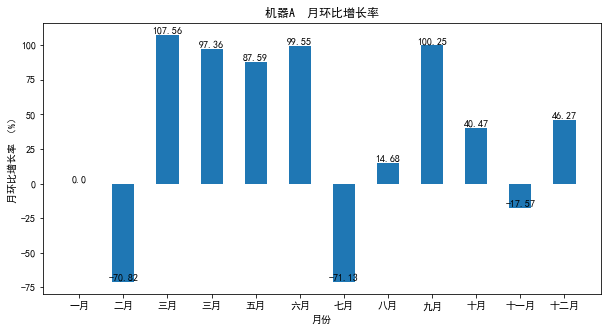

In [34]:
values = np.around( a1 * 100, decimals=2)
label = ['一月','二月','三月','三月','五月','六月','七月','八月','九月','十月','十一月','十二月']# 刻度标签
plt.figure(figsize=(10,5))## 设置画布
#my_height = values[:,-1]
plt.bar(range(1,13), values, width = 0.5)## 绘制柱状图
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('月环比增长率 （%）')## 添加y轴名称
plt.xticks(range(1,13), label)
plt.title('机器A  月环比增长率')## 添加图表标题

for a,b in zip(range(1,13),values):
    plt.text(a, b, b, va='bottom', ha='center')
    
plt.savefig('F:/泰迪/机器A月环比增长图.png')
plt.show()




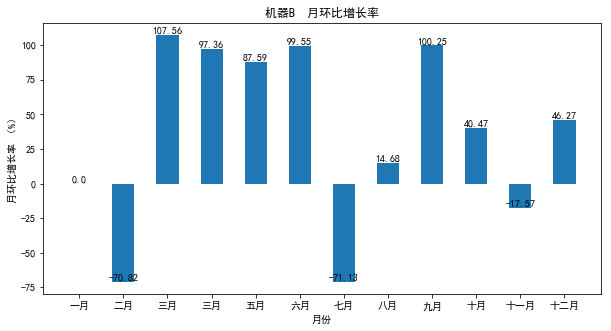

In [35]:
values = np.around( b1 * 100, decimals=2 )
label = ['一月','二月','三月','三月','五月','六月','七月','八月','九月','十月','十一月','十二月']# 刻度标签
plt.figure(figsize=(10,5))## 设置画布
#my_height = values[:,-1]
plt.bar(range(1,13), values, width = 0.5)## 绘制散点图
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('月环比增长率 （%）')## 添加y轴名称
plt.xticks(range(1,13), label)
plt.title('机器B  月环比增长率')## 添加图表标题

for a,b in zip(range(1,13),values):
    plt.text(a, b, b, va='bottom', ha='center')
    
plt.savefig('F:/泰迪/机器B  月环比增长图.png')
plt.show()


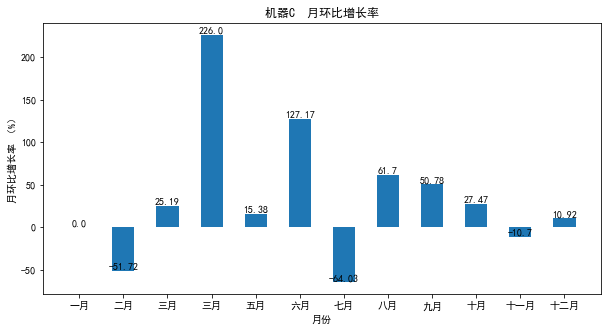

In [36]:
values = np.around( c1 * 100, decimals=2 )
label = ['一月','二月','三月','三月','五月','六月','七月','八月','九月','十月','十一月','十二月']# 刻度标签
plt.figure(figsize=(10,5))## 设置画布
#my_height = values[:,-1]
plt.bar(range(1,13), values, width = 0.5)## 绘制散点图
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('月环比增长率 （%）')## 添加y轴名称
plt.xticks(range(1,13), label)
plt.title('机器C  月环比增长率')## 添加图表标题

for a,b in zip(range(1,13),values):
    plt.text(a, b, b, va='bottom', ha='center')
    
plt.savefig('F:/泰迪/机器C  月环比增长图.png')
plt.show()


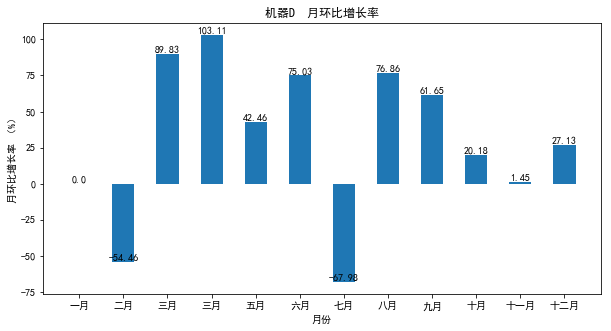

In [37]:
values = np.around( d1 * 100, decimals=2 )
label = ['一月','二月','三月','三月','五月','六月','七月','八月','九月','十月','十一月','十二月']# 刻度标签
plt.figure(figsize=(10,5))## 设置画布
#my_height = values[:,-1]
plt.bar(range(1,13), values, width = 0.5)## 绘制散点图
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('月环比增长率 （%）')## 添加y轴名称
plt.xticks(range(1,13), label)
plt.title('机器D  月环比增长率')## 添加图表标题

for a,b in zip(range(1,13),values):
    plt.text(a, b, b, va='bottom', ha='center')
    
plt.savefig('F:/泰迪/机器D  月环比增长图.png')
plt.show()


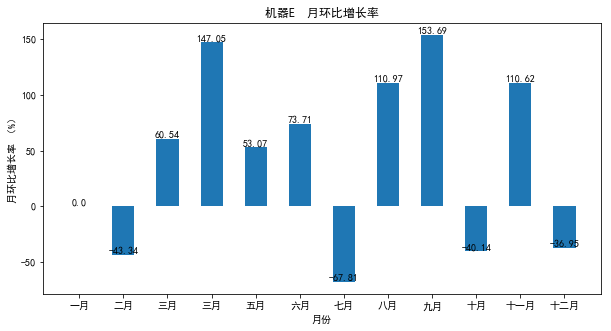

In [38]:

values = np.around( e1 * 100, decimals=2 )
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

label = ['一月','二月','三月','三月','五月','六月','七月','八月','九月','十月','十一月','十二月']# 刻度标签
plt.figure(figsize=(10,5))## 设置画布
#my_height = values[:,-1]

plt.bar(range(1,13), values, width = 0.5)## 绘制散点图
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('月环比增长率 （%）')## 添加y轴名称
plt.xticks(range(1,13), label)
plt.title('机器E  月环比增长率')## 添加图表标题

for a,b in zip(range(1,13),values):
    plt.text(a, b, b, va='bottom', ha='center')
    
plt.savefig('F:/泰迪/机器E 月环比增长图.png')
plt.show()


In [39]:
one2 = one.groupby('大类')
two2 = two.groupby('大类')
three2 = three.groupby('大类')
four2 = four.groupby('大类')
five2 = five.groupby('大类')


In [40]:
A2 = one2.agg({'实际金额':np.sum})
B2 = two2.agg({'实际金额':np.sum})
C2 = three2.agg({'实际金额':np.sum})
D2 = four2.agg({'实际金额':np.sum})
E2 = five2.agg({'实际金额':np.sum})


In [41]:
A2['实际金额'] * [0.2 , 0.25]
a = A2['实际金额'].rename('毛利润')
B2['实际金额'] * [0.2 , 0.25]
b = B2['实际金额'].rename('毛利润')
C2['实际金额'] * [0.2 , 0.25]
c = C2['实际金额'].rename('毛利润')
D2['实际金额'] * [0.2 , 0.25]
d = D2['实际金额'].rename('毛利润')
E2['实际金额'] * [0.2 , 0.25]
e = E2['实际金额'].rename('毛利润')
m = [0,0,0,0,0]
m[0] = np.sum(a)
m[1] = np.sum(b) 
m[2] = np.sum(c)
m[3] = np.sum(d)
m[4] = np.sum(e)
np.around(m,decimals=0)

array([ 42543.00,  42543.00,  61568.00,  33243.00,  95655.00])

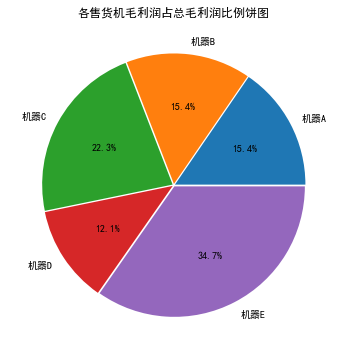

In [42]:
plt.figure(figsize=(6,6))## 将画布设定为正方形，则绘制的饼图是正圆
label= ['机器A','机器B','机器C','机器D','机器E']## 定义饼状图的标签，标签是列表
explode = [0.01, 0.01, 0.01, 0.01, 0.01]## 设定各项离心n个半径
plt.pie(m, explode=explode, labels=label, autopct='%1.1f%%')## 绘制饼图
plt.title('各售货机毛利润占总毛利润比例饼图')
plt.savefig('F:/泰迪/各售货机毛利润占总毛利润比例饼图.png')
plt.show()

In [43]:
#先分好月份，再分二级类目
order4 = order1[['实际金额','支付时间','二级类']].groupby([ order1['支付时间'].dt.month.rename('month'),order1['二级类']]).sum()
print(type(order4))
#order4.to_csv('F:/泰迪/order4.csv',sep = ';',index = False)
print(order4)
print(order4.shape)
order4 = order4.values
print(type(order4))
print(order4.shape)
#sum4 = order4.agg({'实际金额':np.sum})
#a = np.array([31 ,28 ,31 ,30 ,31 ,30 ,31 ,31 ,30 ,31 ,30 ,31])
#sum4 = sum4.values

l=[]
for m in range(0,232):
    for i in order4[m]:
        l.append(i)
l = np.around(l)
print(l)
#sum4 = l
#mean1 = np.around(sum4/a, decimals=0) 
#mean1


<class 'pandas.core.frame.DataFrame'>
                  实际金额
month 二级类             
1     乳制品       1148.0
      功能饮料       718.5
      咖啡         169.5
      坚果炒货        50.0
      方便速食       457.0
      果冻/龟苓膏       5.0
      果蔬饮料       217.0
      植物蛋白       263.2
      水          305.2
      海味零食        60.9
      碳酸饮料       383.7
      糖果/巧克力      53.3
      纸巾          19.2
      肉干/豆制品/蛋   802.5
      膨化食品       325.2
      茶饮料        898.0
      蜜饯/果干      239.8
      饼干糕点       856.0
      香烟         165.0
2     乳制品        343.0
      功能饮料       663.5
      咖啡          23.5
      方便速食       122.9
      果蔬饮料       180.5
      植物蛋白        63.6
      水          208.2
      海味零食        14.5
      碳酸饮料       328.5
      糖果/巧克力       4.0
      肉干/豆制品/蛋   219.0
...                ...
11    海味零食       475.3
      碳酸饮料      3605.9
      糖果/巧克力     266.7
      纸巾         131.6
      肉干/豆制品/蛋  3997.9
      膨化食品      1850.8
      茶饮料       7716.0
      蜜饯/果干     1654.4
      饼干糕点      400

In [44]:
order5 = order1[['实际金额','支付时间','二级类']].groupby([ order1['支付时间'].dt.month.rename('month'),order1['二级类']]).sum()
print(order5)
order5.loc[:, ]

                  实际金额
month 二级类             
1     乳制品       1148.0
      功能饮料       718.5
      咖啡         169.5
      坚果炒货        50.0
      方便速食       457.0
      果冻/龟苓膏       5.0
      果蔬饮料       217.0
      植物蛋白       263.2
      水          305.2
      海味零食        60.9
      碳酸饮料       383.7
      糖果/巧克力      53.3
      纸巾          19.2
      肉干/豆制品/蛋   802.5
      膨化食品       325.2
      茶饮料        898.0
      蜜饯/果干      239.8
      饼干糕点       856.0
      香烟         165.0
2     乳制品        343.0
      功能饮料       663.5
      咖啡          23.5
      方便速食       122.9
      果蔬饮料       180.5
      植物蛋白        63.6
      水          208.2
      海味零食        14.5
      碳酸饮料       328.5
      糖果/巧克力       4.0
      肉干/豆制品/蛋   219.0
...                ...
11    海味零食       475.3
      碳酸饮料      3605.9
      糖果/巧克力     266.7
      纸巾         131.6
      肉干/豆制品/蛋  3997.9
      膨化食品      1850.8
      茶饮料       7716.0
      蜜饯/果干     1654.4
      饼干糕点      4001.0
      香烟         665.0
12    乳制品  

实际金额
month 二级类             
1     乳制品       1148.0
      功能饮料       718.5
      咖啡         169.5
      坚果炒货        50.0
      方便速食       457.0
      果冻/龟苓膏       5.0
      果蔬饮料       217.0
      植物蛋白       263.2
      水          305.2
      海味零食        60.9
      碳酸饮料       383.7
      糖果/巧克力      53.3
      纸巾          19.2
      肉干/豆制品/蛋   802.5
      膨化食品       325.2
      茶饮料        898.0
      蜜饯/果干      239.8
      饼干糕点       856.0
      香烟         165.0
2     乳制品        343.0
      功能饮料       663.5
      咖啡          23.5
      方便速食       122.9
      果蔬饮料       180.5
      植物蛋白        63.6
      水          208.2
      海味零食        14.5
      碳酸饮料       328.5
      糖果/巧克力       4.0
      肉干/豆制品/蛋   219.0
...                ...
11    海味零食       475.3
      碳酸饮料      3605.9
      糖果/巧克力     266.7
      纸巾         131.6
      肉干/豆制品/蛋  3997.9
      膨化食品      1850.8
      茶饮料       7716.0
      蜜饯/果干     1654.4
      饼干糕点      4001.0
      香烟         665.0
12    乳制品       5406.7
      其他          21.7
      功能饮料      7025.8
      咖啡         898.0
      坚果炒货        93.6
      方便速食      2720.5
      果冻/龟苓膏      55.0
      果蔬饮料      1462.5
      植物蛋白      1348.6
      水         2059.8
      海味零食       380.3
      碳酸饮料      3554.6
      糖果/巧克力     118.4
      纸巾          86.6
      肉干/豆制品/蛋  3887.6
      膨化食品      1742.5
      茶饮料       7803.0
      蜜饯/果干     2066.7
      饼干糕点      2928.5
      香烟         910.0

[232 rows x 1 columns]

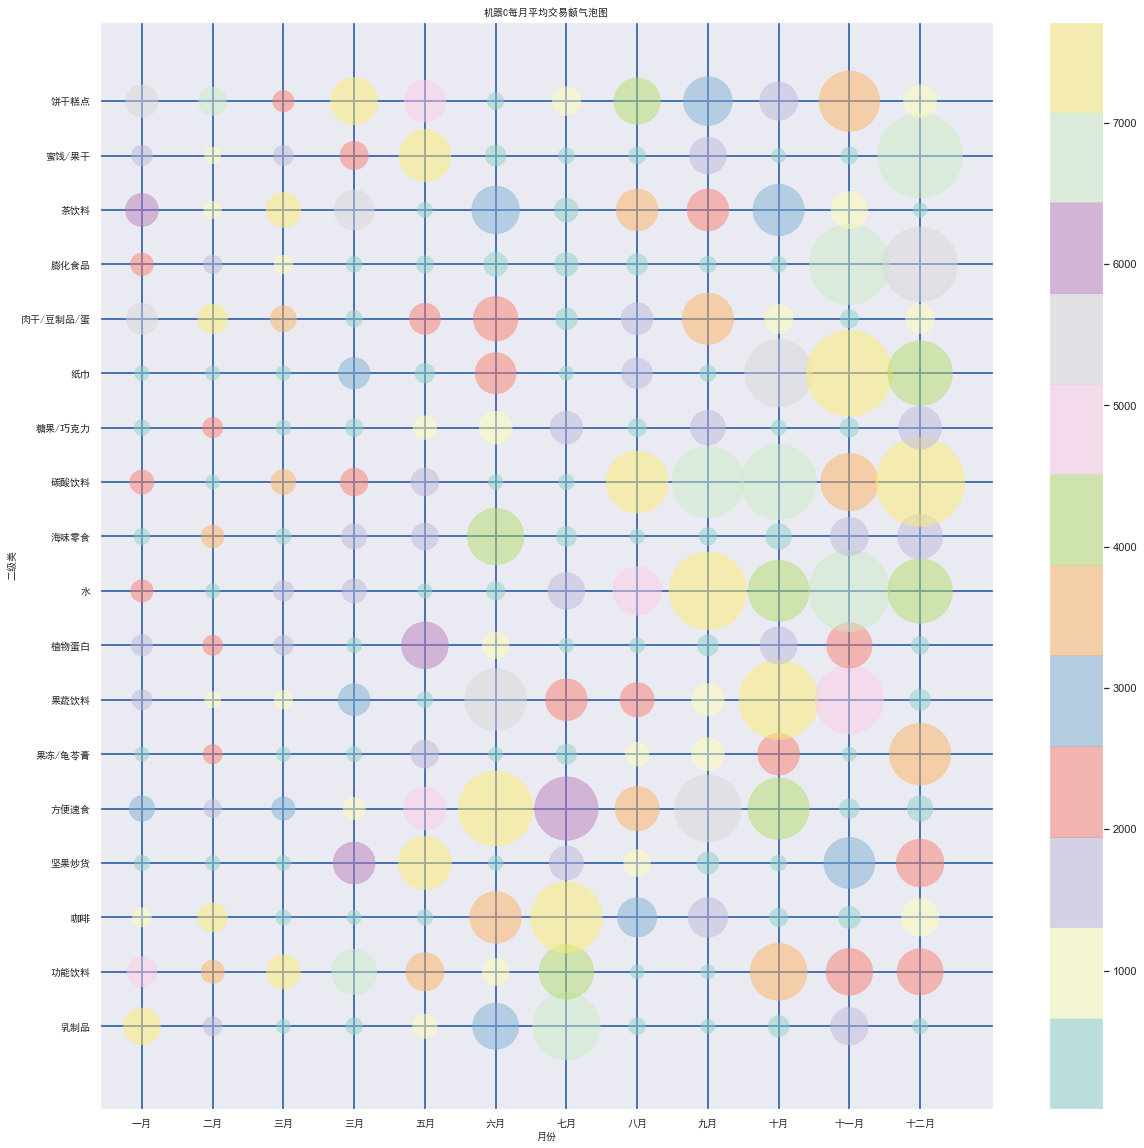

<Figure size 432x288 with 0 Axes>

In [45]:
import matplotlib  as mpl
import seaborn as sns

myfont = mpl.font_manager.FontProperties(fname=r"C:/Windows/Fonts/SimHei.TTF")  #fname指定字体文件  选简体显示中文
#作用是为了消除更换为unicode字体之后0、负数之类的显示异常。之后所有使用中文字体的地方只字符串都以u""的形式出现，并指定fontproperties属性为我们的指定的myfont就行了
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.sans-serif'] = ['SimHei']

#def getChinese():
 #   return fontproperties(fname='C:/Windows/Fonts/simhei.ttf')

x = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
     [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2],
     [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],
     [4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4],
     [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],
     [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6],
     [7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7],
     [8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8],
     [9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9],
     [10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10],
     [11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11],
     [12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12]]
     
def DrawBubble(read_name ,x ):#气泡图 readname为数据来源
    sns.set(style = 'dark')#设置样式
    
    # 刻度标签
    
    y =['乳制品','功能饮料','咖啡','坚果炒货','方便速食','果冻/龟苓膏','果蔬饮料','植物蛋白','水','海味零食','碳酸饮料','糖果/巧克力','纸巾','肉干/豆制品/蛋','膨化食品','茶饮料','蜜饯/果干','饼干糕点']
   
    cm = plt.cm.get_cmap('Set3')  #设置气泡颜色
    fig,ax = plt.subplots(figsize = (20,20))
    #注意s离散化的方法，因为需要通过点的大小来直观感受其所表示的数值大小
    #我所使用的是当前点的数值减去集合中的最小值后+0.1再*1000
    #参数是X轴数据、Y轴数据、各个点的大小、各个点的颜色
    for i in range(0,12):
        z = read_name[18 * i : 18 * i + 18]    #用来调整各个点的大小s
        bubble = ax.scatter(x[i], y , s = (z - np.min(z) + 200) , c = np.squeeze(z), cmap = cm, linewidth = 0.5, alpha = 0.5)
    ax.grid(color='b', linestyle='-', linewidth = 2)  #背景网格线
    fig.colorbar(bubble)
    label = ['一月','二月','三月','三月','五月','六月','七月','八月','九月','十月','十一月','十二月']# 刻度标签
    plt.xticks(range(1,13), label ,fontproperties = myfont ) 
    plt.yticks(fontproperties = myfont)
    plt.title('机器C每月平均交易额气泡图',fontproperties = myfont)
    ax.set_xlabel('月份',fontsize = 15, fontproperties = myfont)#X轴标签
    ax.set_ylabel('二级类',fontsize = 15, fontproperties = myfont)#Y轴标签
    plt.show()
    
if __name__=='__main__':
    DrawBubble(order4,x)

plt.savefig('F:/泰迪/机器C每月平均交易额气泡图.png')
    


In [46]:
a =np.array([[1,2],[3,4],[5,6]])
a[2,1]

6

In [47]:
C0 = three.set_index('支付时间')
print(C0.index,C0.columns)
C6 = C0['2017/6']
C7 = C0['2017/7']
C8 = C0['2017/8']
print('6月份售货机订单总量:',C6.shape[0])
print('7月份售货机订单总量:',C7.shape[0])
print('8月份售货机订单总量:',C8.shape[0])

DatetimeIndex(['2017-01-08 20:22:00', '2017-01-09 21:38:00',
               '2017-04-30 23:21:00', '2017-05-02 18:17:00',
               '2017-05-11 12:50:00', '2017-05-14 08:44:00',
               '2017-05-24 19:27:00', '2017-05-27 09:47:00',
               '2017-05-29 17:36:00', '2017-05-29 23:17:00',
               ...
               '2017-10-12 21:08:00', '2017-08-09 14:52:00',
               '2017-07-05 12:23:00', '2017-12-30 08:50:00',
               '2017-11-14 15:49:00', '2017-11-20 16:38:00',
               '2017-12-14 13:35:00', '2017-11-19 10:41:00',
               '2017-11-15 15:16:00', '2017-12-10 16:18:00'],
              dtype='datetime64[ns]', name='支付时间', length=14493, freq=None) Index(['订单号', '设备ID', '应付金额', '实际金额', '商品', '地点', '状态', '提现', '订单数量', '大类',
       '二级类'],
      dtype='object')
6月份售货机订单总量: 1882
7月份售货机订单总量: 764
8月份售货机订单总量: 1259


In [48]:
C0 = C0['2017/06':'2017/08']
C0 = C0[['订单数量']].resample('H',how = len)  
C0.to_csv('F:/泰迪/订单统计.csv',sep = ',',index = False)
#type(C0)  #dataframe
#C0 = C0['2017'].str.split(',', expand=True)
C0['hour'] = C0.index.hour
C0['day'] = C0.index.day
C0['month'] = C0.index.month

D:\a\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


In [49]:
C0['hour'],C0['day'],C0['month']

(支付时间
 2017-06-01 00:00:00     0
 2017-06-01 01:00:00     1
 2017-06-01 02:00:00     2
 2017-06-01 03:00:00     3
 2017-06-01 04:00:00     4
 2017-06-01 05:00:00     5
 2017-06-01 06:00:00     6
 2017-06-01 07:00:00     7
 2017-06-01 08:00:00     8
 2017-06-01 09:00:00     9
 2017-06-01 10:00:00    10
 2017-06-01 11:00:00    11
 2017-06-01 12:00:00    12
 2017-06-01 13:00:00    13
 2017-06-01 14:00:00    14
 2017-06-01 15:00:00    15
 2017-06-01 16:00:00    16
 2017-06-01 17:00:00    17
 2017-06-01 18:00:00    18
 2017-06-01 19:00:00    19
 2017-06-01 20:00:00    20
 2017-06-01 21:00:00    21
 2017-06-01 22:00:00    22
 2017-06-01 23:00:00    23
 2017-06-02 00:00:00     0
 2017-06-02 01:00:00     1
 2017-06-02 02:00:00     2
 2017-06-02 03:00:00     3
 2017-06-02 04:00:00     4
 2017-06-02 05:00:00     5
                        ..
 2017-08-30 18:00:00    18
 2017-08-30 19:00:00    19
 2017-08-30 20:00:00    20
 2017-08-30 21:00:00    21
 2017-08-30 22:00:00    22
 2017-08-30 23:00:00  

In [163]:
C0['订单数量']

支付时间
2017-06-01 00:00:00     6
2017-06-01 01:00:00     0
2017-06-01 02:00:00     1
2017-06-01 03:00:00     0
2017-06-01 04:00:00     2
2017-06-01 05:00:00     0
2017-06-01 06:00:00     0
2017-06-01 07:00:00     6
2017-06-01 08:00:00     4
2017-06-01 09:00:00    11
2017-06-01 10:00:00     2
2017-06-01 11:00:00     3
2017-06-01 12:00:00     4
2017-06-01 13:00:00     5
2017-06-01 14:00:00     3
2017-06-01 15:00:00     1
2017-06-01 16:00:00     2
2017-06-01 17:00:00     3
2017-06-01 18:00:00     7
2017-06-01 19:00:00    11
2017-06-01 20:00:00     5
2017-06-01 21:00:00     2
2017-06-01 22:00:00    13
2017-06-01 23:00:00     5
2017-06-02 00:00:00     2
2017-06-02 01:00:00     1
2017-06-02 02:00:00     1
2017-06-02 03:00:00     1
2017-06-02 04:00:00     0
2017-06-02 05:00:00     0
                       ..
2017-08-30 18:00:00     0
2017-08-30 19:00:00     0
2017-08-30 20:00:00     3
2017-08-30 21:00:00     0
2017-08-30 22:00:00     1
2017-08-30 23:00:00     0
2017-08-31 00:00:00     0
2017-08

In [164]:
C0['订单数量'].values

array([6, 0, 1, ..., 3, 0, 2], dtype=int64)

In [183]:
#合并列
Z = np.vstack([C0['hour'],C0['订单数量'].values])
Y = np.vstack([C0['month'],C0['day']])
X = np.vstack([Y,Z]).T  #4列
print(X.shape,Y.shape)

X = pd.DataFrame(X)
print(type(X))
X = X.rename(columns= {0:'month',1:'day',2:'hour',3:'订单数量'})  #修改列索引
X['month'] = X['month'].apply(str)
X['day'] = X['day'].apply(str)
X['date'] = X['month'] + '-' + X['day']  #+ '-'
print(X)


(2208, 4) (2, 2208)
<class 'pandas.core.frame.DataFrame'>
     month day  hour  订单数量  date
0        6   1     0     6   6-1
1        6   1     1     0   6-1
2        6   1     2     1   6-1
3        6   1     3     0   6-1
4        6   1     4     2   6-1
5        6   1     5     0   6-1
6        6   1     6     0   6-1
7        6   1     7     6   6-1
8        6   1     8     4   6-1
9        6   1     9    11   6-1
10       6   1    10     2   6-1
11       6   1    11     3   6-1
12       6   1    12     4   6-1
13       6   1    13     5   6-1
14       6   1    14     3   6-1
15       6   1    15     1   6-1
16       6   1    16     2   6-1
17       6   1    17     3   6-1
18       6   1    18     7   6-1
19       6   1    19    11   6-1
20       6   1    20     5   6-1
21       6   1    21     2   6-1
22       6   1    22    13   6-1
23       6   1    23     5   6-1
24       6   2     0     2   6-2
25       6   2     1     1   6-2
26       6   2     2     1   6-2
27       6   2    

In [190]:
labels = X['date']
labels = np.unique(labels)

labels

array(['6-1', '6-10', '6-11', '6-12', '6-13', '6-14', '6-15', '6-16',
       '6-17', '6-18', '6-19', '6-2', '6-20', '6-21', '6-22', '6-23',
       '6-24', '6-25', '6-26', '6-27', '6-28', '6-29', '6-3', '6-30',
       '6-4', '6-5', '6-6', '6-7', '6-8', '6-9', '7-1', '7-10', '7-11',
       '7-12', '7-13', '7-14', '7-15', '7-16', '7-17', '7-18', '7-19',
       '7-2', '7-20', '7-21', '7-22', '7-23', '7-24', '7-25', '7-26',
       '7-27', '7-28', '7-29', '7-3', '7-30', '7-31', '7-4', '7-5', '7-6',
       '7-7', '7-8', '7-9', '8-1', '8-10', '8-11', '8-12', '8-13', '8-14',
       '8-15', '8-16', '8-17', '8-18', '8-19', '8-2', '8-20', '8-21',
       '8-22', '8-23', '8-24', '8-25', '8-26', '8-27', '8-28', '8-29',
       '8-3', '8-30', '8-31', '8-4', '8-5', '8-6', '8-7', '8-8', '8-9'],
      dtype=object)

In [191]:
X = X.drop(labels = 'month',axis = 1)
X = X.drop(labels = 'day',axis = 1)
X = X.reindex(columns=['date','hour','订单数量'], fill_value=0)
X

,date,hour,订单数量
0,6-1,0,6
1,6-1,1,0
2,6-1,2,1
3,6-1,3,0
4,6-1,4,2
5,6-1,5,0
6,6-1,6,0
7,6-1,7,6
8,6-1,8,4
9,6-1,9,11


In [192]:
X = pd.pivot_table(X, index = 'hour', columns = 'date', aggfunc = np.sum)
print(X)  #不按顺序


     订单数量                                               ...                \
date  6-1 6-10 6-11 6-12 6-13 6-14 6-15 6-16 6-17 6-18  ... 8-29 8-3 8-30   
hour                                                    ...                 
0       6    0    1    2    2    1    2    3    3    0  ...    0   0    0   
1       0    1    4    0    0    1    0    2    1    0  ...    0   0    0   
2       1    0    0    2    0    1    0    1    1    2  ...    0   2    0   
3       0    0    1    2    1    1    0    0    0    2  ...    0   0    0   
4       2    0    0    1    0    0    0    0    2    0  ...    0   0    0   
5       0    0    1    0    0    1    0    0    0    0  ...    0   0    0   
6       0    0    0    0    0    0    0    0    1    0  ...    0   0    0   
7       6    2    1    2    2    1    0    6    1    1  ...    0   0    1   
8       4    0    0    1    3    0    2    0    2    0  ...    2   1    0   
9      11    3    4    0    0    1    3    3    0    1  ...    1   2    4   

D:\a\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
D:\a\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


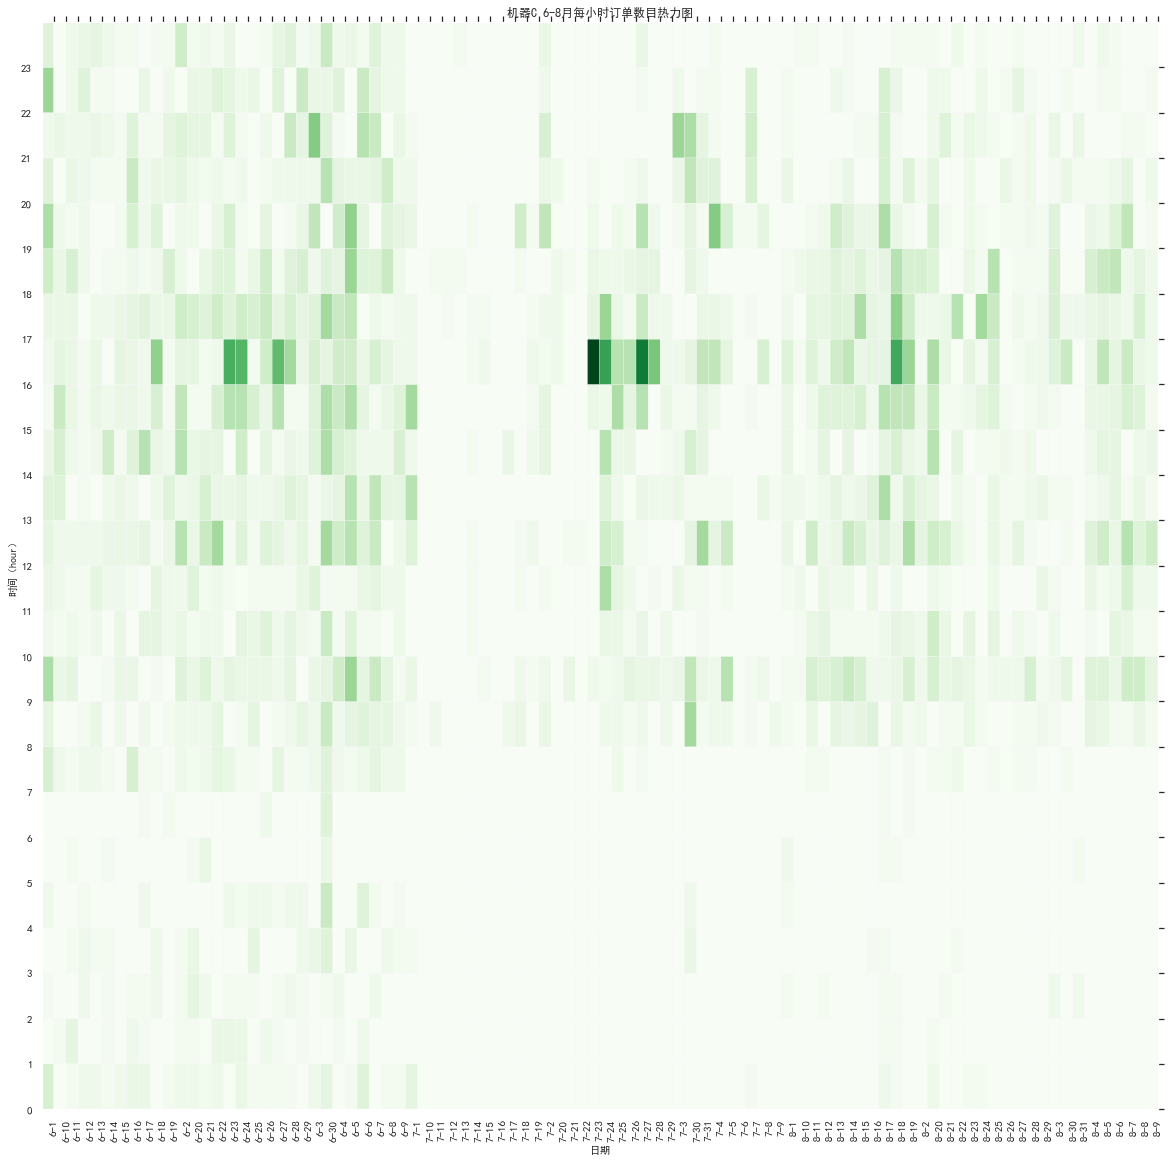

<Figure size 432x288 with 0 Axes>

In [199]:
# 缺失值填充（不填充的话pcolor函数无法绘制）
X.fillna(0,inplace=True)
# 删除表格的索引名称
X.index.name = None
#从0到23排序
X.sort_index(ascending=True, inplace=True)

# ======================开始绘图=========================
# 设置中文和负号正常显示
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.sans-serif'] = ['SimHei']

fig,ax = plt.subplots(figsize = (20,20))
plt.pcolor(X, cmap=plt.cm.Greens, edgecolors = 'white') # 指定绘图数据  # 指定填充色 # 指点单元格之间的边框色          
           

# 添加x轴和y轴刻度标签(加0.5是为了让刻度标签居中显示)
plt.xticks(range(1,93),labels,rotation = 90)
plt.yticks(range(0,24))
plt.xlabel('日期',fontsize = 15, fontproperties = myfont)#X轴标签
plt.ylabel('时间（hour）',fontsize = 15, fontproperties = myfont)#Y轴标签
# 消除图框顶部和右部的刻度线
plt.tick_params(top='on', right = 'on')
# 添加标题
plt.title('机器C 6-8月每小时订单数目热力图')
# 显示图形
plt.show()
plt.savefig('F:/泰迪/机器C 6-8月每小时订单数目热力图.png')
